# Descriptive statistics of ecological features in soil

### Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Read dataframe with all ecological information

In [6]:
# Read dataframe with ecological information but removing zero-inflated features
df_path = './inputs/FQ_enzim_agras_hong_func_CLASIF.csv'
all_data = pd.read_csv(df_path, index_col=0, sep ='\t')

In [7]:
all_data.head()

,Bact_total,Lumbricina,Formicidae,Isoptera,Coleoptera,Araneae,Diplopoda,Chilopoda,Larvas,Enchytraeidae,...,Prevotella,Reyranella,Rhodoplanes,Solirubrobacter,Sphingomonas,Sulfobacillus,Tellurimicrobium,Thermodesulfobium,Thermovenabulum,Vicinamibacter
taxon,,,,,,,,,,,,,,,,,,,,,
BPF12,1006,240,720,0,160,0,0,320,240,3280,...,2,5,15,6,8,2,5,23,17,39
BPF14,978,0,160,0,0,160,0,0,160,4720,...,2,4,16,4,14,1,2,16,10,60
BPF22,987,0,5520,0,80,0,0,80,480,3680,...,0,5,21,4,11,0,0,12,4,38
BPF24,1012,400,4000,0,80,80,0,0,320,8000,...,1,5,17,1,3,2,2,9,6,30
BPF32,973,80,23840,0,400,160,0,160,240,1520,...,0,3,19,3,11,0,6,13,3,41


## Data manipulation

In [8]:
# Subset by index starting with BP, MP, and NA (treatments)
bp_data = all_data[all_data.index.str.startswith('BP')]
mp_data = all_data[all_data.index.str.startswith('MP')]
na_data = all_data[all_data.index.str.startswith('NA')]

In [9]:
# Check correct subsetting
(len(bp_data) + len(mp_data) + len(na_data)) == len(all_data)

True

## Descriptive statistics

In [10]:
lists_of_data = [bp_data, mp_data, na_data]

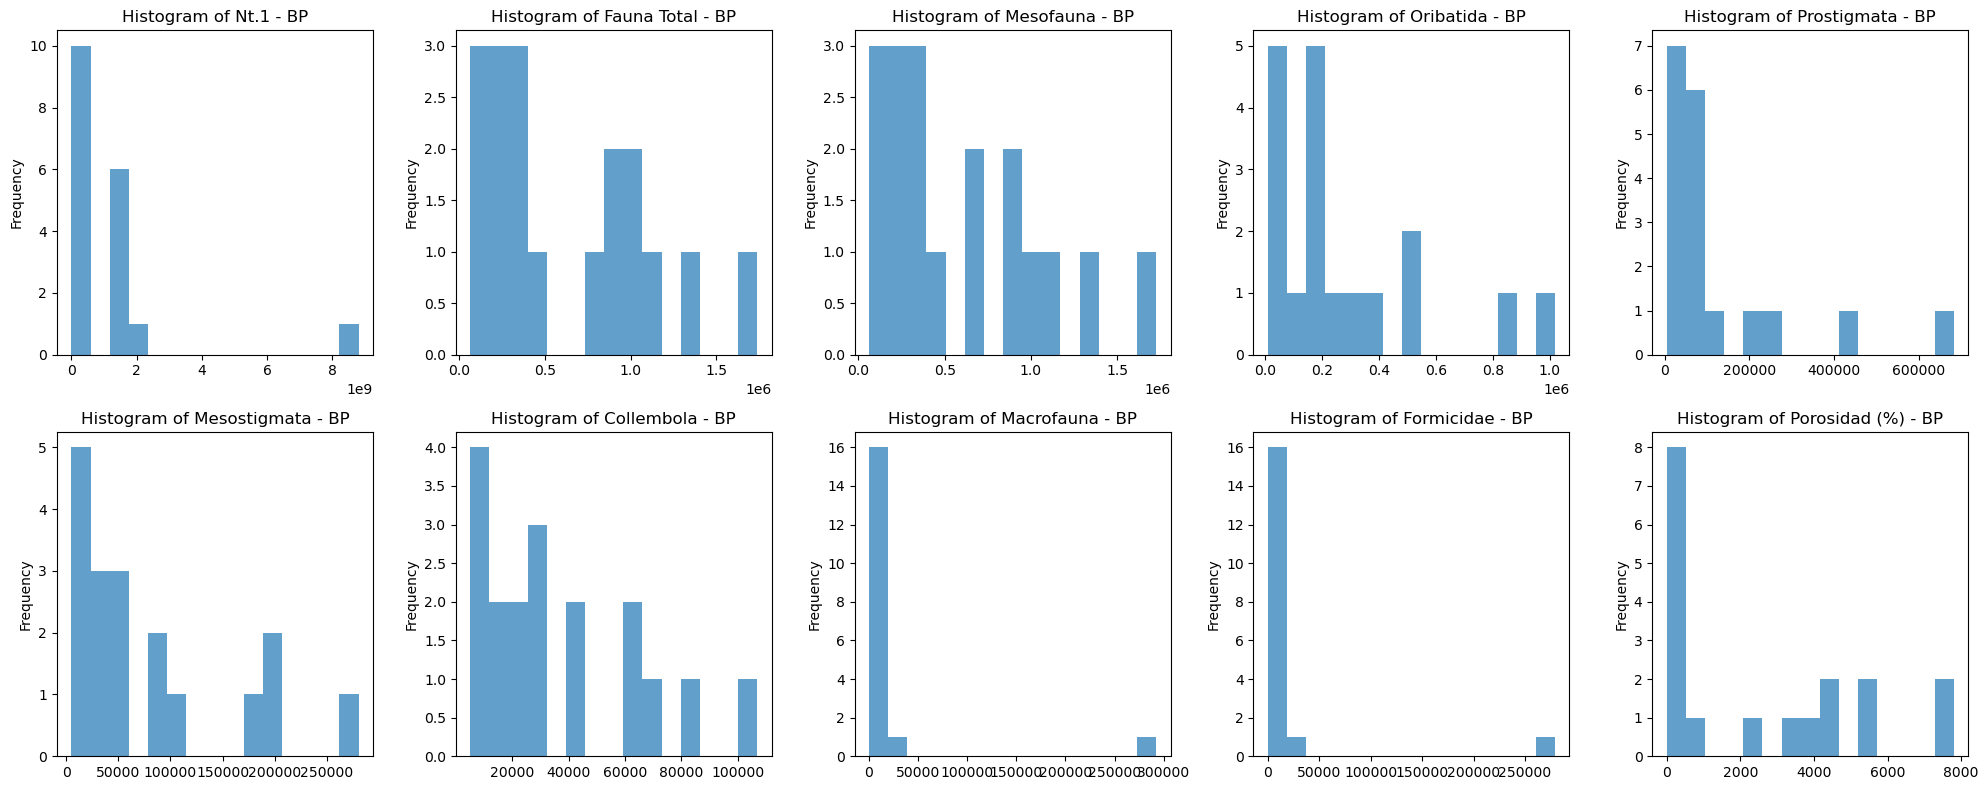

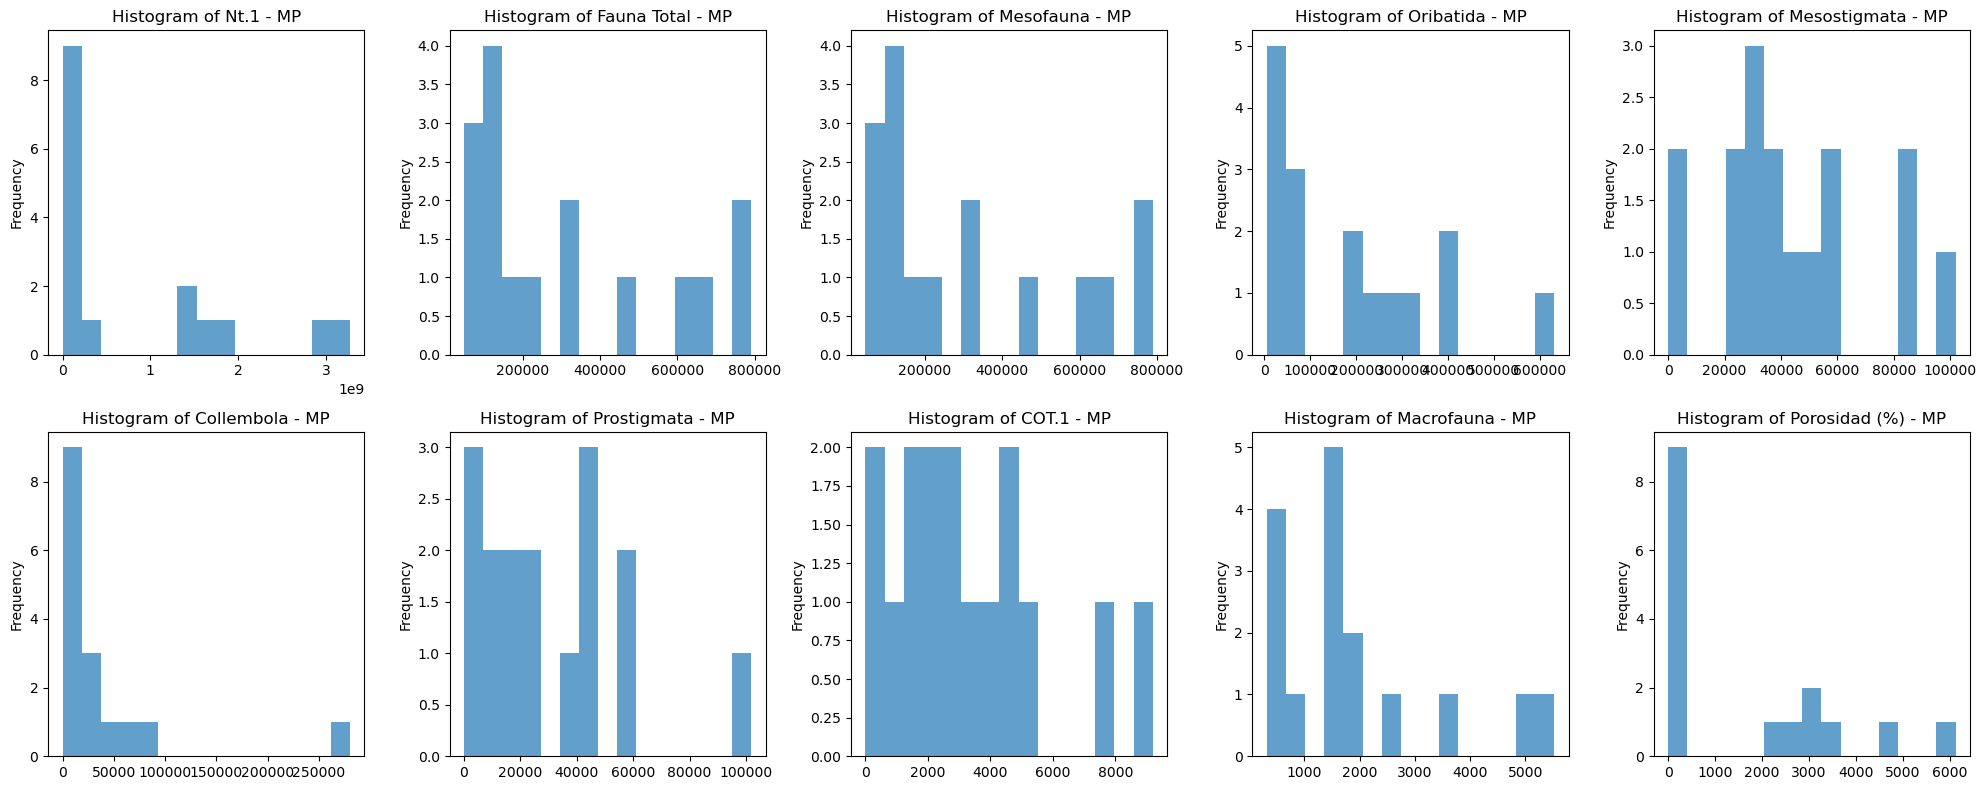

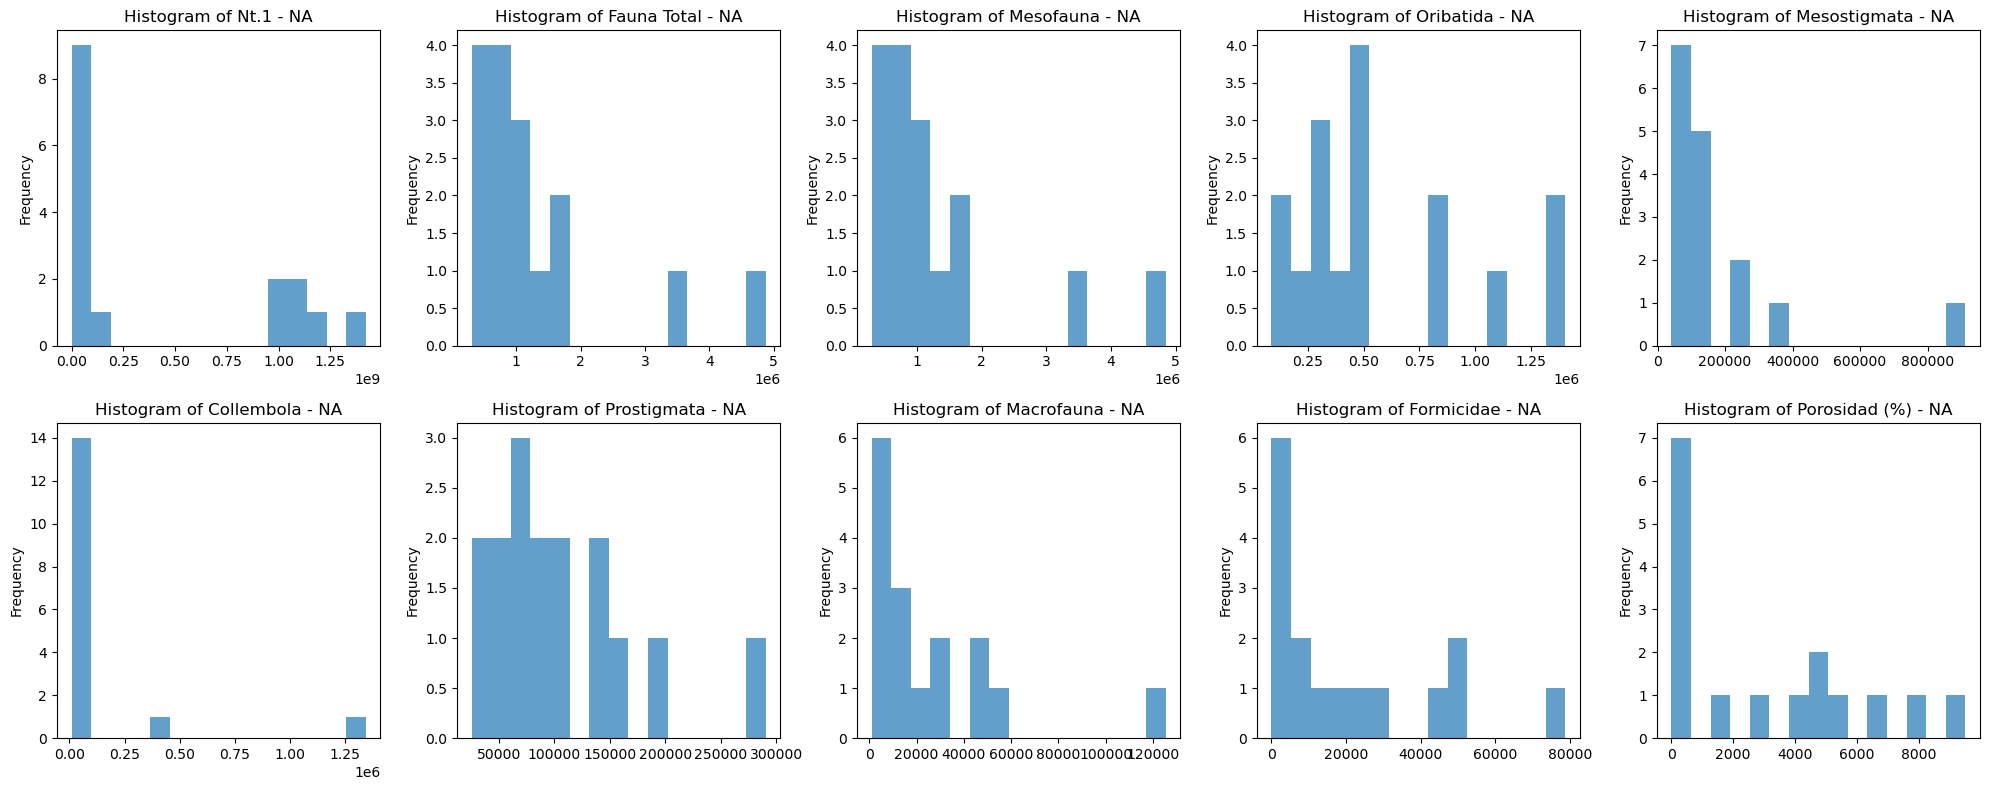

In [11]:
for treatment in lists_of_data:

    # Get mean abundance for each variable
    mean_abundance = treatment.mean().sort_values(ascending=False)

    # Select top 10 variables
    top10_vars = mean_abundance.head(10).index.tolist()

    # Plot histograms for top 10 variables
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()
    for i, var in enumerate(top10_vars):
        treatment[var].plot.hist(ax=axes[i], bins=15, alpha=0.7)
        axes[i].set_title(f'Histogram of {var} - {treatment.index[0][:2]}')
    plt.tight_layout()
    plt.show()

### Make biplot to see the representation of the variables projected in the principal components of the samples

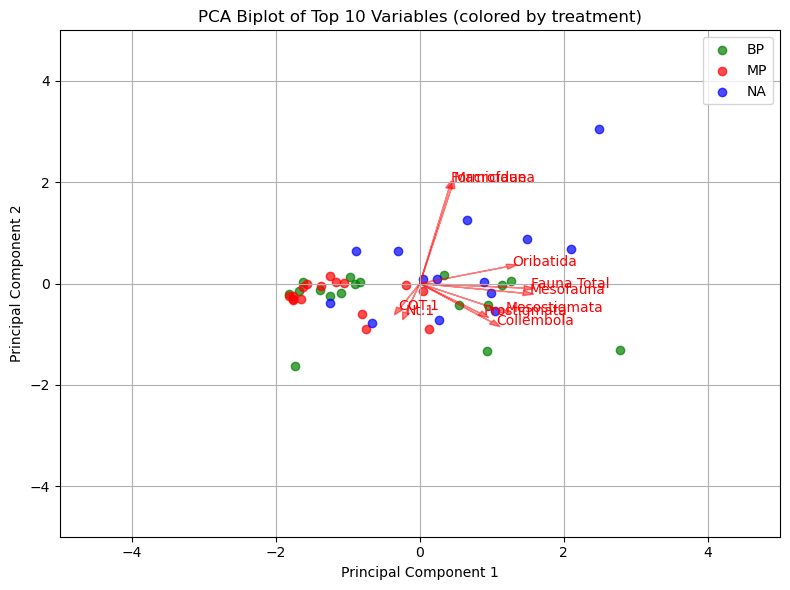

In [ ]:
# Add treatment labels
bp_data = all_data[all_data.index.str.startswith('BP')].copy()
bp_data['treatment'] = 'BP'
mp_data = all_data[all_data.index.str.startswith('MP')].copy()
mp_data['treatment'] = 'MP'
na_data = all_data[all_data.index.str.startswith('NA')].copy()
na_data['treatment'] = 'NA'

all_treatments = pd.concat([bp_data, mp_data, na_data])  # Combine all treatments

# Select the top 10 variables by mean abundance across all samples
mean_abundance = all_treatments.drop('treatment', axis=1).mean().sort_values(ascending=False)
top10_vars = mean_abundance.head(10).index.tolist()

# Standardize to make PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_treatments[top10_vars])

# PCA algorithm
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Plot PCA
plt.figure(figsize=(8,6))
for t, color in zip(['BP', 'MP', 'NA'], ['green', 'red', 'blue']):
    idx = all_treatments['treatment'] == t
    plt.scatter(principal_components[idx, 0], principal_components[idx, 1], label=t, alpha=0.7, color=color)

# Add variable loadings (arrows to make biplot)
loadings = pca.components_.T
for i, var in enumerate(top10_vars):
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, color='r', alpha=0.5, head_width=0.1)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, var, color='r', fontsize=10)

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot of Top 10 Variables (colored by treatment)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Variables like bacteria or fauna are relevant to explain the variance of the samples for BP (Good Practices) and AN (Natural Environment). On the other hand, MP (Not Good Practices) samples are forming a cluster with BP samples isolated from AN samples.